### Описание проекта

Несмотря на огромные вложения в рекламу Procrastinate Pro+, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах этого.

Работа будет проведена на данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

#### План проекта
1. Загрузка данных
2. Предобработка данных:заполнение пропусков в данных, удаление дубликатов, изменение типов данных, а также нахождение аномалий и необычных значений в столбцах с категориальными и количественными значениями.
3. Перевести столбцы с указанием даты и времени в формат datetime
4. Задать следующие функции: 
get_profiles() — для создания профилей пользователей,
get_retention() — для подсчёта Retention Rate,
get_conversion() — для подсчёта конверсии,
get_ltv() — для подсчёта LTV.
5. Задать функции для построения графиков:
filter_data() — для сглаживания данных,
plot_retention() — для построения графика Retention Rate,
plot_conversion() — для построения графика конверсии,
plot_ltv_roi — для визуализации LTV и ROI.
6. Составить профили пользователей. 
7. Определить минимальную и максимальную даты привлечения пользователей.
8. Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
9. Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
10. Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
11. Посчитать общую сумму расходов на маркетинг.
12. Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
13. Построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализировать динамику изменения расходов во времени по месяцам по каждому источнику.
14. Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.
15. Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. 
16. Ответить на такие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?
17. Выделить причины неэффективности привлечения пользователей.
18. Сформулировать рекомендации для отдела маркетинга.

### Загрузка и предобработка данных

**План**
1. Изучение данных
2. Обработка пропусков
3. Переименование столбцов
4. Преобразование типов данных
5. Обработка дубликатов
6. Выявить аномалии в данных
7. Проверка категориальных значений
8. Выводы по предобработке

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline


In [50]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')



#### изучение данных

Выводы:
- Пропусков не обнаружено
- Есть столбцы с типом данных object, когда по логике должен быть datetime

In [51]:
visits.head()





,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [52]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [53]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [54]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [55]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [56]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [57]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


#### Обработка пропусков
Пропуски в данных отсутствуют

#### Изменение названий столбцов для удобства

Выводы: все названия столбцов приведены к нижнему регистру


In [58]:
visits.columns = visits.columns.str.lower()
visits.head()

,user id,region,device,channel,session start,session end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [59]:
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()


#### Преобразование типов данных
Во всех датасетах даты были представлены в типе данных object. Их необходимо перевести в тип datetime.

In [60]:
visits['session start'] = pd.to_datetime(visits['session start'])
visits['session snd'] = pd.to_datetime(visits['session end'])

orders['event dt'] = pd.to_datetime(orders['event dt'])
costs['dt'] = pd.to_datetime(costs['dt'])


#### Удаление дубликатов
Выводы: явных дубликатов обнаружено не было.

In [61]:
print(f'Число строк в датасета visits: {len(visits)}\nЧисло строк в датасета orders: {len(orders)}\nЧисло строк в датасета costs: {len(costs)}')

Число строк в датасета visits: 309901
Число строк в датасета orders: 40212
Число строк в датасета costs: 1800


In [62]:
visits = visits.drop_duplicates()
orders = orders.drop_duplicates()
costs = costs.drop_duplicates()

print(f'После удаления дубликатов\nЧисло строк в датасета visits: {len(visits)}\nЧисло строк в датасета orders: {len(orders)}\nЧисло строк в датасета costs: {len(costs)}')

После удаления дубликатов
Число строк в датасета visits: 309901
Число строк в датасета orders: 40212
Число строк в датасета costs: 1800


#### Проверка категориальных значений
Посмотрим на уникальные значения категориальных признаков, изучим количество значений по каждому из категориальных признаков.

Вывод: неявных дубликатов или каких-либо аномалий в категориальных значениях не обнаружено.


In [63]:
for column in visits.columns:
    unique_values = visits[column].value_counts()
    print(f"Уникальные значения в {column}: {unique_values}\n")

Уникальные значения в user id: 33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user id, Length: 150008, dtype: int64

Уникальные значения в region: United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

Уникальные значения в device: iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Уникальные значения в channel: organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Уникальные значения в session start: 2019-06-27 14:5

In [64]:
for column in orders.columns:
    unique_values = orders[column].value_counts()
    print(f"Уникальные значения в {column}: {unique_values}\n")

Уникальные значения в user id: 901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
237296010927     1
319939546352     1
742075710598     1
202972423389     1
775233404832     1
Name: user id, Length: 8881, dtype: int64

Уникальные значения в event dt: 2019-09-29 09:03:24    2
2019-10-25 16:24:24    2
2019-09-27 03:56:55    2
2019-08-12 22:50:49    2
2019-09-09 20:01:39    2
                      ..
2019-09-26 04:24:10    1
2019-10-26 06:25:45    1
2019-07-10 17:04:38    1
2019-08-06 08:55:42    1
2019-09-25 16:41:33    1
Name: event dt, Length: 40163, dtype: int64

Уникальные значения в revenue: 4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64



In [65]:
for column in costs.columns:
    unique_values = costs[column].value_counts()
    print(f"Уникальные значения в {column}: {unique_values}\n")

Уникальные значения в dt: 2019-10-10    10
2019-06-01    10
2019-08-30    10
2019-10-14    10
2019-06-12    10
              ..
2019-05-24    10
2019-07-08    10
2019-08-22    10
2019-10-06    10
2019-08-26    10
Name: dt, Length: 180, dtype: int64

Уникальные значения в channel: MediaTornado          180
WahooNetBanner        180
AdNonSense            180
TipTop                180
FaceBoom              180
OppleCreativeMedia    180
RocketSuperAds        180
lambdaMediaAds        180
YRabbit               180
LeapBob               180
Name: channel, dtype: int64

Уникальные значения в costs: 6.40      26
3.36      21
9.60      20
16.80     19
4.32      17
          ..
217.80     1
186.20     1
176.70     1
273.00     1
55.00      1
Name: costs, Length: 608, dtype: int64



#### Поиск количественных аномалий
План:
- Посмотреть на гистограммы всех количественных значений и значений типа datetime на адекватность распределения
- Посмотреть статистическое описание всех колонок с числовыми значениями
- Посмотреть диаграммы размаха для выручки и стоимости рекламных кампаний
- Сделать выводы

Выводы:
Статистические аномалии были обнаружены в столбцах revenue датасета orders и costs столбца costs. Однако с содержательной точки зрения оснований для их удаления нет. Это могут быть либо очень дорогостоящие рекламные кампании или крупные пользовательские заказы.

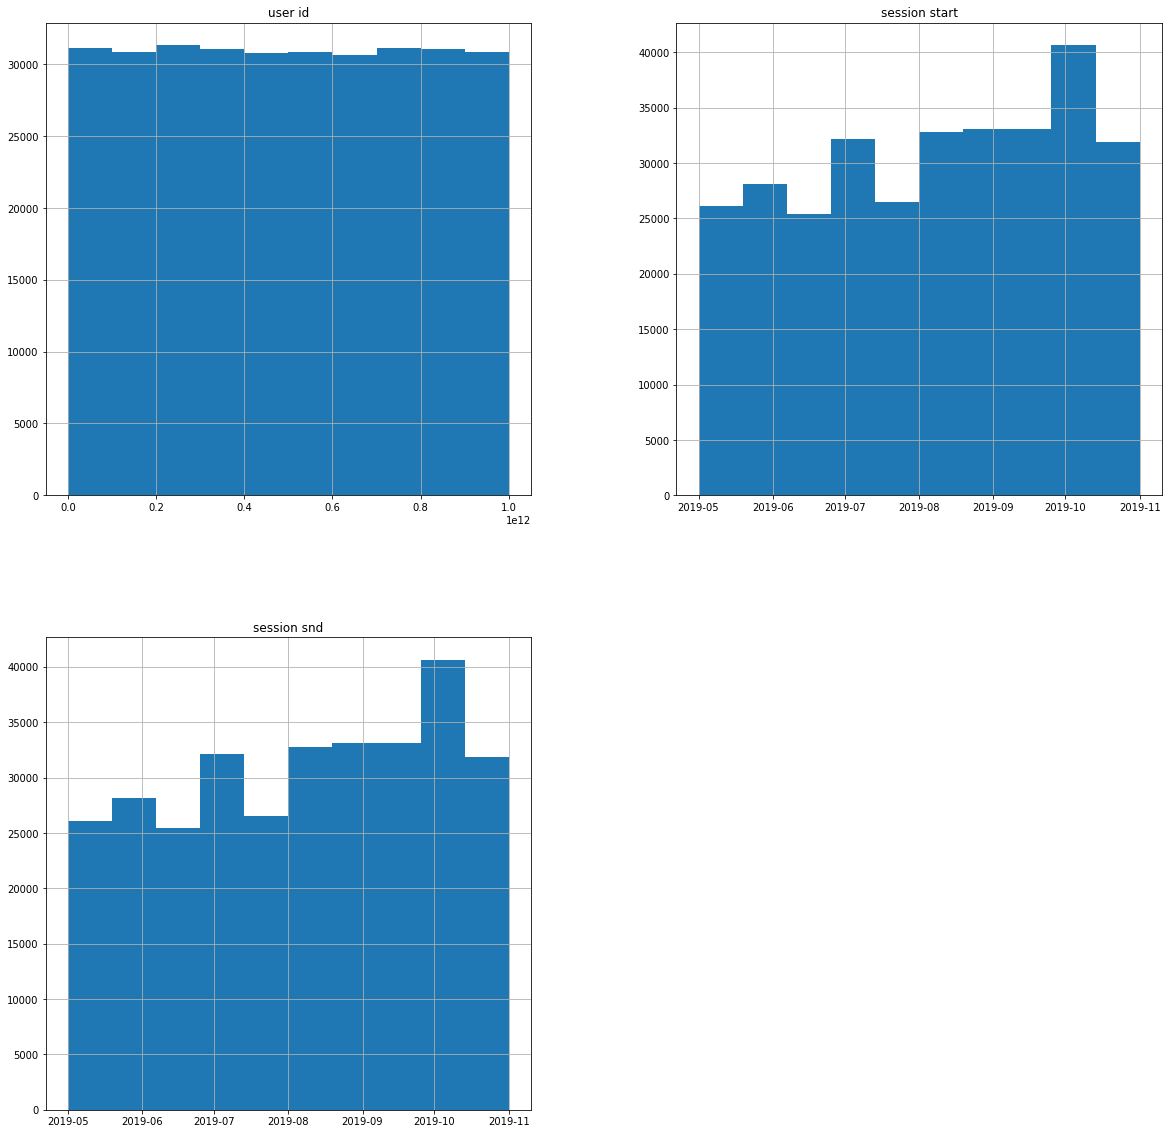

,user id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


In [66]:
#В столбце visits
visits.hist(figsize=(20,20))
plt.show()
visits.describe()

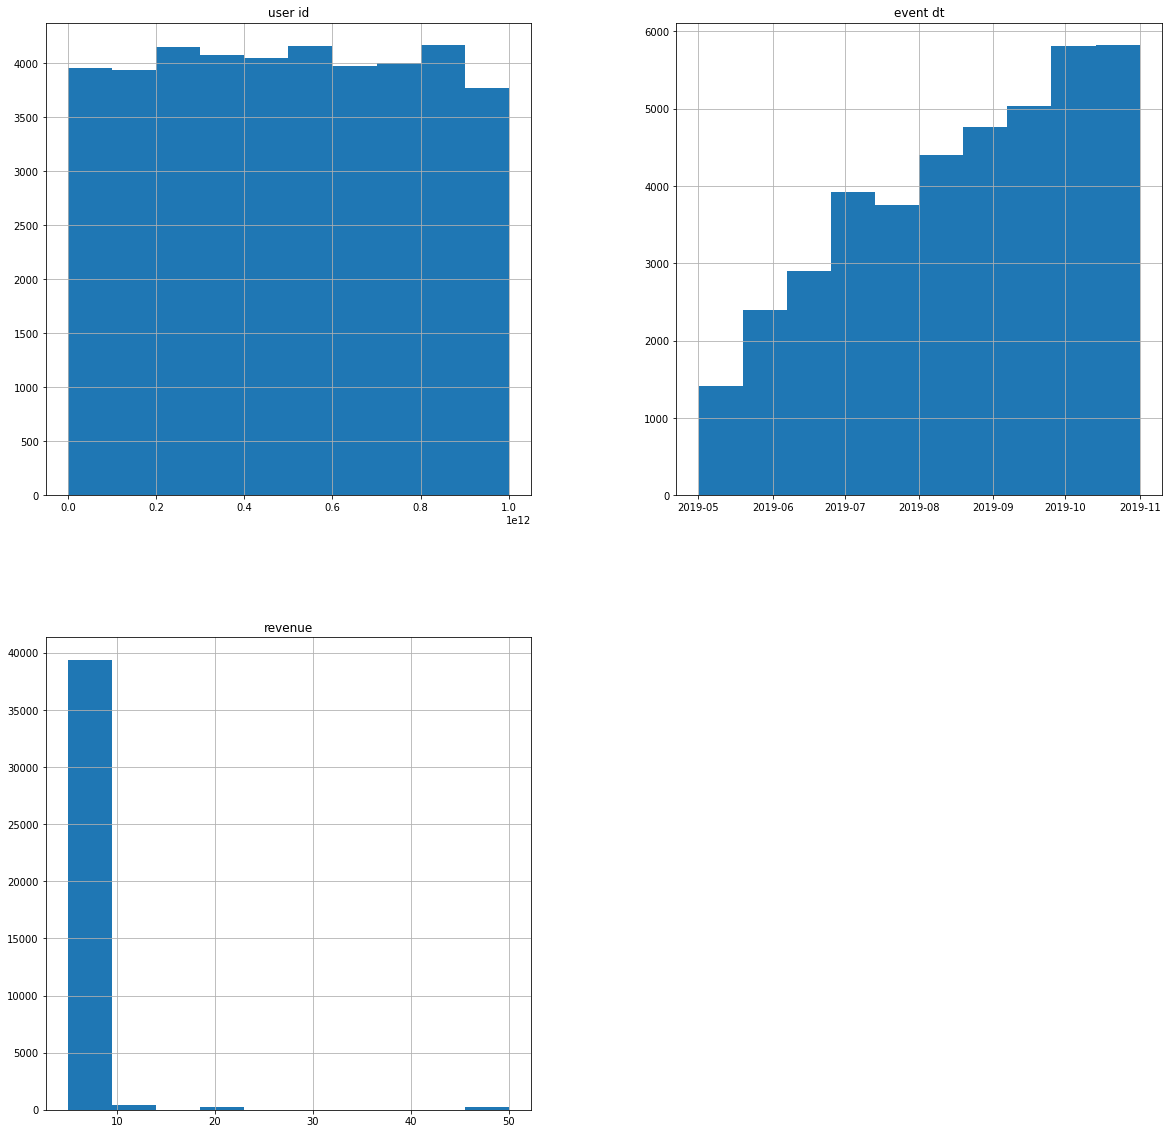

,user id,revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [67]:
#В столбце orders
orders.hist(figsize=(20,20))
plt.show()
orders.describe()

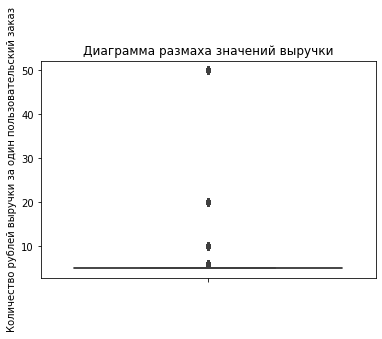

In [68]:
sns.boxplot(y=orders['revenue'])


plt.title('Диаграмма размаха значений выручки')
plt.ylabel('Количество рублей выручки за один пользовательский заказ')

plt.show()

[[<AxesSubplot:title={'center':'dt'}>
  <AxesSubplot:title={'center':'costs'}>]]


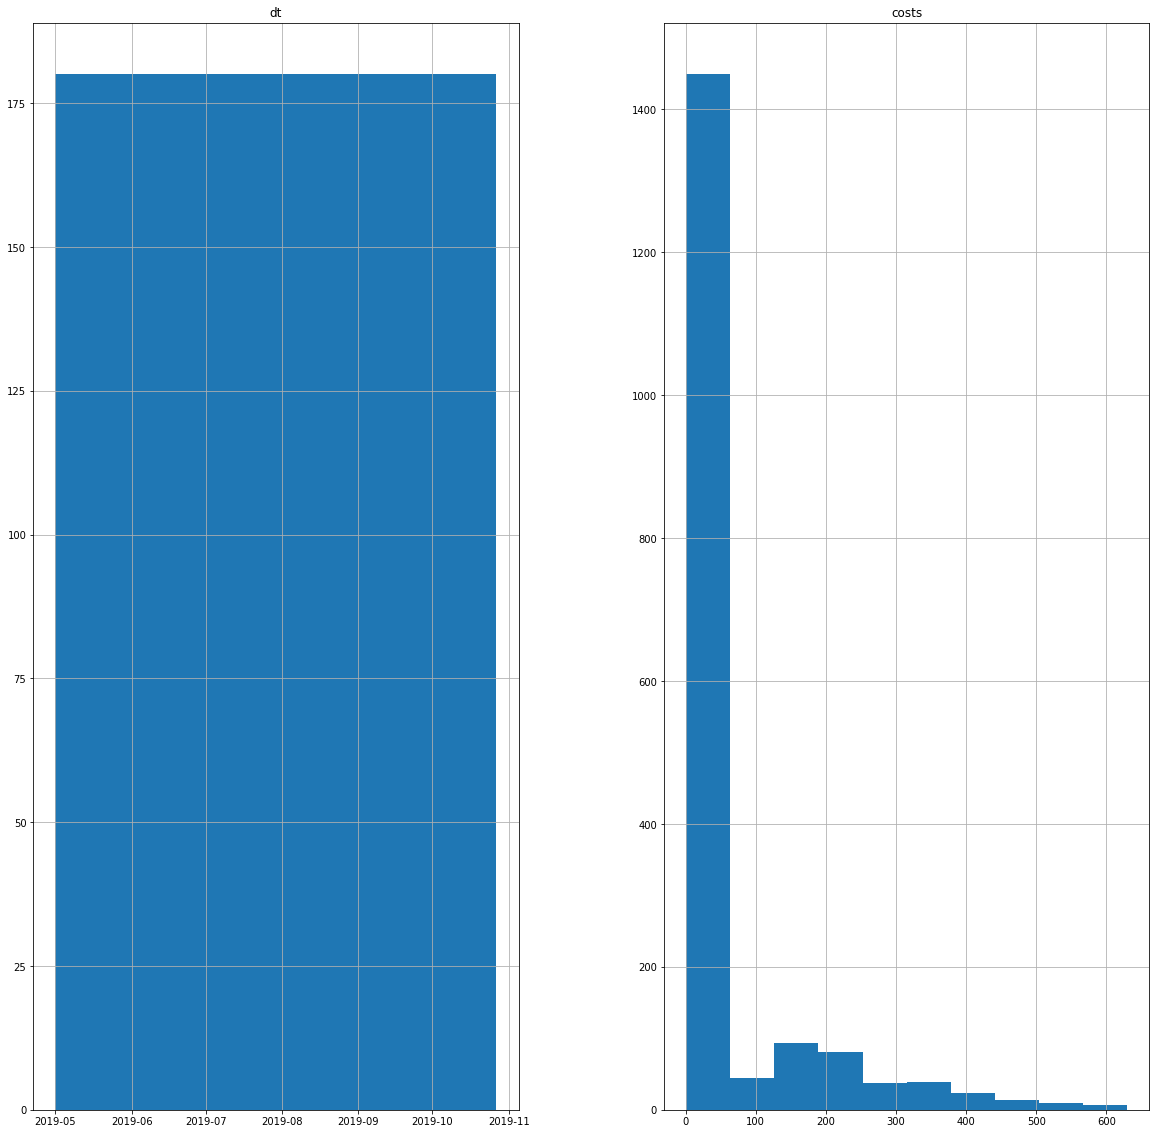

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [69]:
#В столбце costs
print(costs.hist(figsize=(20,20)))
plt.show()
costs.describe()

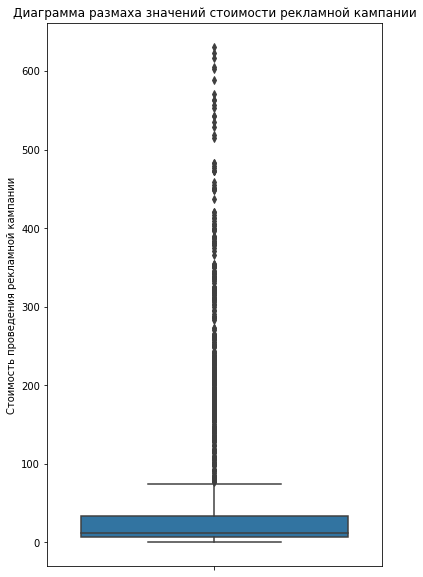

In [70]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=costs['costs'])


plt.title('Диаграмма размаха значений стоимости рекламной кампании')
plt.ylabel('Стоимость проведения рекламной кампании')

plt.show()

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция создания профилей пользователей

In [71]:
visits.head()

,user id,region,device,channel,session start,session end,session snd
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40,2019-05-01 03:57:40


In [72]:
def get_profiles(sessions):

    # сортируем сессии по ID пользователя и дате первого посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        sessions.sort_values(by=['user id', 'session start'])
        .groupby('user id')
        .agg({'session start': 'first', 'channel': 'first', 'region' : 'first', 'device' : 'first'})
        .rename(columns={'session start': 'first ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first ts'].dt.date
    profiles['month'] = profiles['first ts'].astype('datetime64[M]')

    return profiles

#### Retention Rate

In [73]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    
       # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user id', 'session start']], on='user id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session start'] - result_raw['first ts']
    ).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All_users'
    
        dimensions = ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort size'], axis=0)
        result = result[['cohort size'] + list(range(horizon_days))]
        result['cohort size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['month'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Конверсия

In [74]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user id', 'event dt'])
        .groupby('user id')
        .agg({'event dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user id', 'event dt']], on='user id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event dt'] - result_raw['first ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort size'], axis=0)
        result = result[['cohort size'] + list(range(horizon_days))]
        result['cohort size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['month'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


#### LTV

In [75]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    #print(result_raw)

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user id', 'event dt', 'revenue']],
        on='user id',
        how='left',
    )

    #print(result_raw)
    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event dt'] - result_raw['first ts']
    ).dt.days # то есть на какой день была совершенна покупка
    #print(result_raw)
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1) # камсам это специальный метод для подсчета с накоплением

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        #print(result_raw)
        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    #print(result_grouped)
    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions+['month'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

#### LTV Roi

In [76]:
def get_ltv_roi(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user id', 'event dt', 'revenue']], on='user id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event dt'] - result_raw['first ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user id', 'acquisition cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition cost': 'mean'})
            .rename(columns={'acquisition cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi, cac

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped, cac = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time, cac_history = group_by_dimensions(
        result_raw, dimensions + ['month'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time, cac # таблица динамики ROI
    )

#### Функция сглаживания данных

In [77]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Визуализация удержания

In [78]:
def plot_retention(retention, retention_history, horizon, dimensions=[]):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 5))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    #if retention.index.nlevels == 1:
        #retention['cohort'] = 'All users'
        #retention = retention.reset_index().set_index(['cohort'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    
    retention.T.plot(
        grid=True, 
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1))
    plt.xlabel('Лайфтайм')
    plt.title('Удержание пользователей')
    
    # в третьей ячейке — динамика удержания платящих
    
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['month', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.pivot_table(
        index='month', columns=columns, values=[13], aggfunc='mean'
    ).plot(grid=True)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания пользователей на {}-й день'.format('14'
        )
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1))           
    retention_history.pivot_table(
        index='month', columns=columns, values=[1], aggfunc='mean'
    ).plot(grid=True)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания пользователей на {}-й день'.format('2'
        )
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1))
    plt.show()

#### График конверсии

In [79]:
def plot_conversion(conversion, conversion_history, dimensions=[], legend = 12):

     # размер сетки для графиков

    # для кривых конверсии исключаем размеры когорт
    report = conversion.drop(columns=['cohort size'])
    plt.figure(figsize=(25, 10))
    report.T.plot(
        # строим кривые конверсии в первой ячейке таблицы графиков
        grid=True, xticks=list(report.columns.values))
    
    plt.title('Конверсия первых 14 дней с разбивкой по {}'.format(dimensions))
    plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1), fontsize=legend)
    # для графика истории изменений 
    # преобразуем таблицу динамики конверсии
    
    report = (
        conversion_history[13]
        .reset_index()
        .pivot_table(index='month', columns=dimensions, values=13, aggfunc='mean')
        .fillna(0)  # заполняем пропуски на случай, если они возникнут
    )
    report.plot(
        # во второй ячейке строим график истории изменений
        grid=True
    )
    
    
    plt.title('Динамика конверсии 14 дня с разбивкой по признаку {}'.format(dimensions))
    plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1), fontsize=legend)
    
    
    report = (
        conversion_history[1]
        .reset_index()
        .pivot_table(index='month', columns=dimensions, values=1, aggfunc='mean')
        .fillna(0)  # заполняем пропуски на случай, если они возникнут
    )
    report.plot(
        # во второй ячейке строим график истории изменений
        grid=True
    )
    
    
    plt.title('Динамика конверсии второго дня с разбивкой по признаку {}'.format(dimensions))
    plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1), fontsize=legend)

    plt.show()

#### График LTV ROI

In [80]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7, fontsize=12):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(fontsize=fontsize)
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['month']]
    filtered_data = ltv_history.pivot_table(
        index='month', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.legend(fontsize=fontsize)
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['month']]
    filtered_data = cac_history.pivot_table(
        index='month', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.legend(fontsize=fontsize)
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=fontsize)
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['month']]
    filtered_data = roi_history.pivot_table(
        index='month', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.show()


# строим графики

#### Функция Profiles costs

In [81]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles_costs(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profile = (
        sessions.sort_values(by=['user id', 'session start'])
        .groupby('user id')
        .agg(
            {
                'session start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session start': 'first ts'})
        .reset_index()  # возвращаем user_id из индекса
    )
    #print(profile)
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profile['dt'] = profile['first ts'].dt.date
    profile['month'] = profile['first ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profile['payer'] = profile['user id'].isin(orders['user id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profile[event] = profile['user id'].isin(
                events.query('event name == @event')['user id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profile.groupby(['dt', 'channel'])
        .agg({'user id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user id': 'unique users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'])



    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition cost'] = ad_costs['costs'] / ad_costs['unique users']
    ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
    profile['dt'] = pd.to_datetime(profile['dt'])
    # добавим стоимость привлечения в профили
    profile = profile.merge(
        ad_costs[['dt', 'channel', 'acquisition cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profile['acquisition cost'] = profile['acquisition cost'].fillna(0)
    
    return profile  # возвращаем профили с CAC

### Исследовательский анализ данных

####  Составление пользовательских профилей

Задачи:
- Составить таблицу пользовательских профилей
- Определить минимальную и максимальную дату привлечения


In [82]:
profiles = get_profiles(visits)
profiles.head()

,user id,first ts,channel,region,device,dt,month
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01
1,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01
2,6085896,2019-10-01 09:58:33,organic,France,iPhone,2019-10-01,2019-10-01
3,22593348,2019-08-22 21:35:48,AdNonSense,Germany,PC,2019-08-22,2019-08-01
4,31989216,2019-10-02 00:07:44,YRabbit,United States,iPhone,2019-10-02,2019-10-01


In [83]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print('Min date:', min_date, ' ', 'Max date:', max_date)

Min date: 2019-05-01   Max date: 2019-10-27


#### Таблица пользователей по странам

Задачи:
- Выяснить, из каких стран пользователи приходят в приложение
- На какую страну приходится больше всего платящих пользователей 
- Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [84]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [85]:
orders_countries = orders.merge(profiles, on=['user id'], how = 'left')
orders_countries.head()

orders_countries = orders_countries.groupby('region')['user id'].nunique().sort_values(ascending=False).reset_index().rename(columns = {'user id' : 'count of payers'})

users_by_countries = profiles.groupby('region')['user id'].count().reset_index()

orders_countries = orders_countries.merge(users_by_countries, how = 'left', on = 'region')
orders_countries['part of payers'] = orders_countries['count of payers'] / orders_countries['user id']
orders_countries = orders_countries.rename(columns = {'user id' : 'count of users'})
orders_countries


,region,count of payers,count of users,part of payers
0,United States,6902,100002,0.069019
1,UK,700,17575,0.039829
2,France,663,17450,0.037994
3,Germany,616,14981,0.041119


<function matplotlib.pyplot.show(close=None, block=None)>

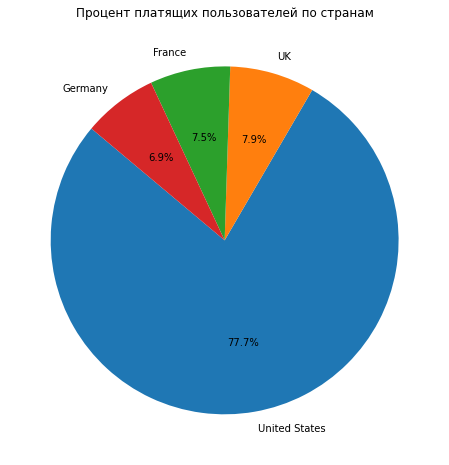

In [86]:
plt.figure(figsize=(8, 8))  # Размер фигуры
plt.pie(orders_countries['count of payers'], labels=orders_countries['region'], autopct='%1.1f%%', startangle=140)
plt.title('Процент платящих пользователей по странам')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

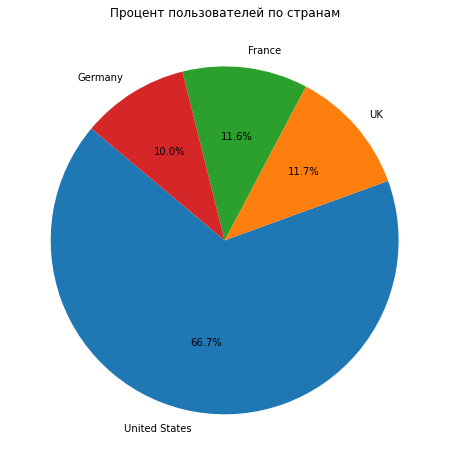

In [87]:
plt.figure(figsize=(8, 8))  # Размер фигуры
plt.pie(orders_countries['count of users'], labels=orders_countries['region'], autopct='%1.1f%%', startangle=140)
plt.title('Процент пользователей по странам')
plt.show


**Выводы**
1. Пользователи входят в приложение из следующих стран: США, Франция, Германия, Великобритания.
2. Больше всего платящих пользователей приходится на Штаты
3. Самая высокая доля платящих пользователей приходится на США (почти 7%), далее Германия (4.1%). Далее идут Великобритания и Франция со значениями 3.9% и  3.7% соответственно.

#### Таблица пользователей и платящих по девайсам

Задачи:
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
- Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [88]:
visits['device'].unique()

orders.merge(profiles[['user id', 'device']], how = 'left', on = 'user id').groupby('device')['user id'].nunique().reset_index()

,device,user id
0,Android,2050
1,Mac,1912
2,PC,1537
3,iPhone,3382


In [89]:
orders_devices = orders.merge(profiles, on=['user id'], how = 'left')
orders_devices.head()

orders_devices = orders_devices.groupby('device')['user id'].nunique().sort_values(ascending=False).reset_index().rename(columns = {'user id' : 'count of payers'})

users_by_devices = profiles.groupby('device')['user id'].count().reset_index()

orders_devices = orders_devices.merge(users_by_devices, how = 'left', on = 'device')
orders_devices['part of payers'] = orders_devices['count of payers'] / orders_devices['user id']
orders_devices = orders_devices.rename(columns = {'user id' : 'count of users'})
orders_devices

,device,count of payers,count of users,part of payers
0,iPhone,3382,54479,0.062079
1,Android,2050,35032,0.058518
2,Mac,1912,30042,0.063644
3,PC,1537,30455,0.050468


**Выводы**
1. Пользователи пользуются следующими устройствами: Android, Mac, PC, Iphone
2. Больше всего пользователей заходят с Айфона (54479). Платящих пользователей также больше всего имеет Айфон (3382). Однако по доле платящих пользователей первое место занимает Mac (6.3%), Iphone второе место (6.2%).

#### Таблица пользователей и платящих по каналам

- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. 
- Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [90]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [91]:
orders.merge(profiles[['user id', 'channel']], how = 'left', on = 'user id').groupby('channel')['user id'].nunique().sort_values(ascending=False).reset_index()

,channel,user id
0,FaceBoom,3557
1,TipTop,1878
2,organic,1160
3,WahooNetBanner,453
4,AdNonSense,440
5,RocketSuperAds,352
6,LeapBob,262
7,OppleCreativeMedia,233
8,lambdaMediaAds,225
9,YRabbit,165


In [92]:
orders_channels = orders.merge(profiles, on=['user id'], how = 'left')


orders_channels = orders_channels.groupby('channel')['user id'].nunique().sort_values(ascending=False).reset_index().rename(columns = {'user id' : 'count of payers'})

users_by_channels = profiles.groupby('channel')['user id'].count().reset_index()

orders_channels = orders_channels.merge(users_by_channels, how = 'left', on = 'channel')
orders_channels['part of payers'] = orders_channels['count of payers'] / orders_channels['user id']
orders_channels = orders_channels.rename(columns = {'user id' : 'count of users'})
orders_channels

,channel,count of payers,count of users,part of payers
0,FaceBoom,3557,29144,0.122049
1,TipTop,1878,19561,0.096007
2,organic,1160,56439,0.020553
3,WahooNetBanner,453,8553,0.052964
4,AdNonSense,440,3880,0.113402
5,RocketSuperAds,352,4448,0.079137
6,LeapBob,262,8553,0.030633
7,OppleCreativeMedia,233,8605,0.027077
8,lambdaMediaAds,225,2149,0.104700
9,YRabbit,165,4312,0.038265


**Выводы**
1. Больше всего платящих пользователей пришло из источника FaceBoom (3500), далее идет TipTop (1870), затем идет естественное привлечение (1160).
2. Самая высокая доля платящих пользователей в канале FaceBoom (12%). Наименьшая доля соответствует каналу OppleCreativeMedia (2.7%), при том что привлечено через этот канал было 8600 пользователей. Тоже самое касается источника LeapBob (3% при 8500 привлеченных).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Расходы на маркетинг

In [93]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [94]:
costs['costs'].sum().round()

105497.0

#### Расходы по источникам

In [95]:
costs.groupby('channel')['costs'].sum().sort_values(ascending=False)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

**Выводы**:
1. Самые высокие расходы связанны с источником TipTop (54700). Следом идет FaceBoom (32400). Сопоставляя расходы на источники и их эффективность, стоит обратить внимание на TipTop и FaceBoom.

#### График динамики расходов
Задачи:
- Построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику
- Затем на другом графике визуализировать динамику изменения расходов во времени по месяцам по каждому источнику.

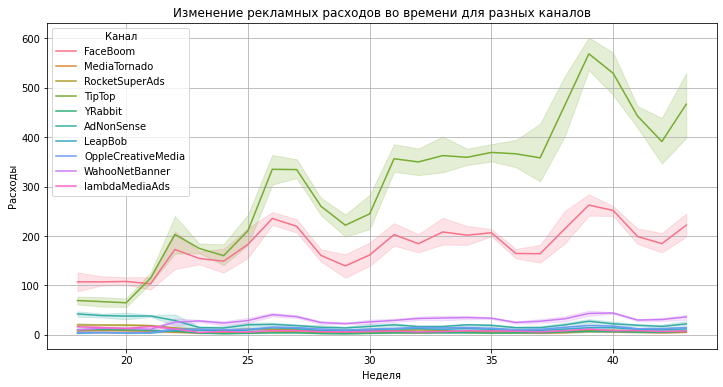

In [96]:
costs['week'] = costs['dt'].dt.isocalendar().week.astype('int')


channel_groups = costs.groupby('channel')

plt.figure(figsize=(12, 6))
sns.lineplot(data=costs, x='week', y='costs', hue='channel', palette='husl')

plt.title('Изменение рекламных расходов во времени для разных каналов')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.grid(True)
plt.legend(title='Канал')
plt.show()

          dt   channel  costs  week
0 2019-05-01  FaceBoom  113.3    18
1 2019-05-02  FaceBoom   78.1    18
2 2019-05-03  FaceBoom   85.8    18
3 2019-05-04  FaceBoom  136.4    18
4 2019-05-05  FaceBoom  122.1    18


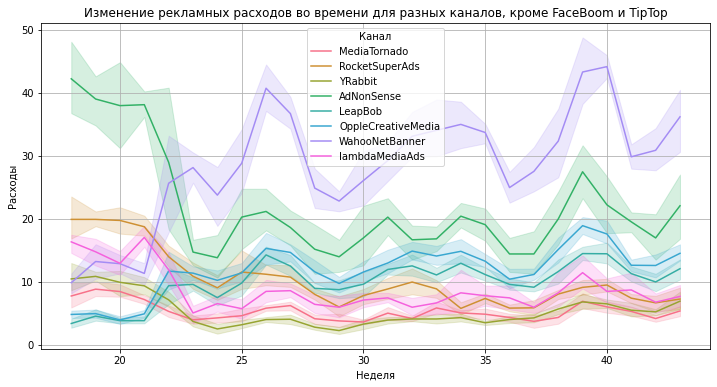

In [99]:
costs['week'] = costs['dt'].dt.isocalendar().week.astype('int')

print(costs.head())

costs_filtered = costs[~(costs['channel'] == 'FaceBoom') & ~(costs['channel'] == 'TipTop')]

channel_groups_filtered = costs_filtered.groupby('channel')

plt.figure(figsize=(12, 6))
sns.lineplot(data=costs_filtered, x='week', y='costs', hue='channel', palette='husl')

plt.title('Изменение рекламных расходов во времени для разных каналов, кроме FaceBoom и TipTop')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.grid(True)
plt.legend(title='Канал')
plt.show()

**Выводы**
1. На протяжении всего времени росли расходы на два источника привлечения: FaceBoom и TipTop.
2. Расходы на FaceBoom и TipTop росли скачкообразно. Есть три заметных пика: на 23, 27 и 39 неделях.
2. Расходы на остальные источники практически не менялись во времени.

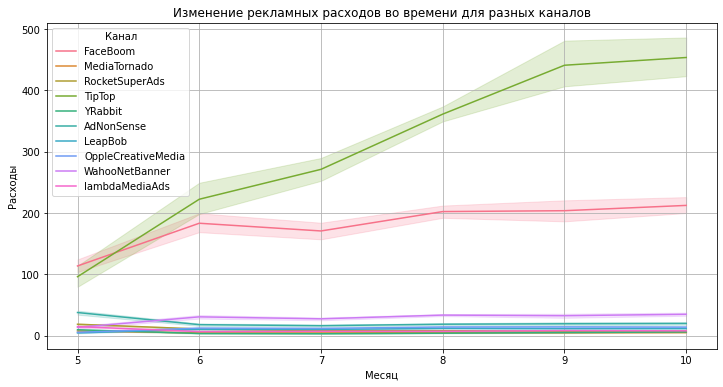

In [100]:
costs['month'] = costs['dt'].dt.month

channel_groups = costs.groupby('channel')

plt.figure(figsize=(12, 6))
sns.lineplot(data=costs, x='month', y='costs', hue='channel', palette='husl')

plt.title('Изменение рекламных расходов во времени для разных каналов')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.grid(True)
plt.legend(title='Канал')
plt.show()



/tmp/ipykernel_146/2914780757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costs_filtered['month'] = costs['dt'].dt.month


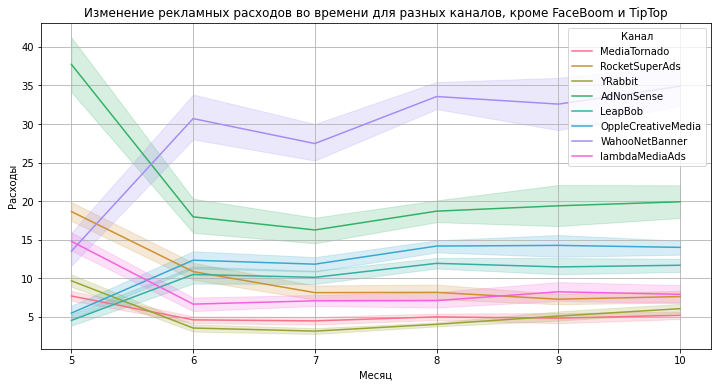

In [101]:
costs_filtered['month'] = costs['dt'].dt.month


plt.figure(figsize=(12, 6))
sns.lineplot(data=costs_filtered, x='month', y='costs', hue='channel', palette='husl')

plt.title('Изменение рекламных расходов во времени для разных каналов, кроме FaceBoom и TipTop')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.grid(True)
plt.legend(title='Канал')
plt.show()

**Выводы**

За весь период наблюдения положительную динамику расходов имели только два источника: FaceBoom и TipTop, причем показатели TipTop росли заметно быстрее на протяжении всего времени. К концу периода наблюдени разрыв в затратах между двумя источниками составил почти 300 д.е.

Предварительные подозрения падают на источник TipTop, а также источники OppleCreativeMedia и LeapBob. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Вопрос включения в анализ органических пользователей.**

С одной стороны, мы изучаем эффективность рекламной компании, поэтому органические пользователи могут исказить результаты анализа. Органические пользователи приходят сами, мы на них не можем повлиять.
Однако, может быть важно сравнить показатели у пользователей от рекламных источников с органическими пользователями, чтобы понять, в рекламе ли вообще дело. Например, посмотреть просадку LTV.
Можно, конечно, предположить, что есть связь между активностью органических пользователей и рекламными кампаниями, но это очень маловероятно.

Так что создадим два датасета, один без органических пользователей, другой только с ними.

In [102]:
visits_organic = visits[visits['channel'] == 'organic']
visits = visits[visits['channel'] != 'organic']
visits_organic['channel'].unique()

array(['organic'], dtype=object)

#### Окупаемость рекламы

**Задачи:**
- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI
- а также графиков динамики LTV, CAC и ROI.

#### LTV

In [103]:
profiles['dt'] = pd.to_datetime(profiles['dt']).dt.date
profiles['first ts'] = pd.to_datetime(profiles['first ts'])
orders['event dt'] = pd.to_datetime(orders['event dt'])

#ltv_raw, ltv, ltv_history = get_ltv(
    #profiles, orders, datetime(2019, 11, 1).date(), 14)
profiles = get_profiles_costs(visits, orders, [], costs)
ltv_raw, ltv, ltv_history, roi_grouped, roi_history, cac = get_ltv_roi(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

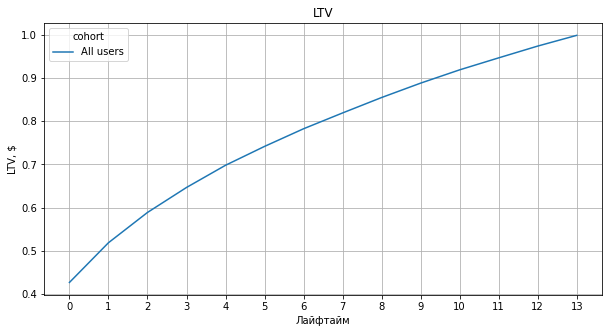

In [104]:
report = ltv.drop(columns=['cohort size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

In [105]:
visits['session start'] = pd.to_datetime(visits['session start'])
orders['event dt'] = pd.to_datetime(orders['event dt'])
costs['dt'] = pd.to_datetime(costs['dt'])


In [106]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')


#### САС

In [107]:

cac = ltv_profiles['acquisition cost'].mean()
cac


1.1007569765375043

#### График ROI

In [108]:
roi = ltv / cac 



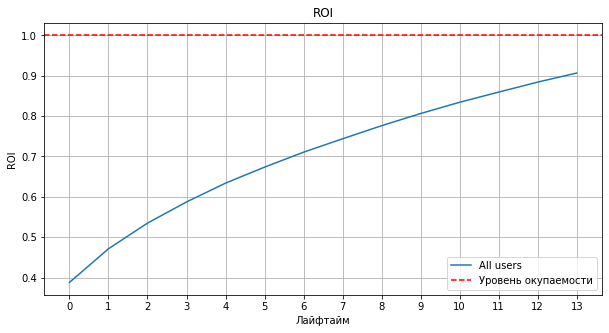

In [109]:
report = roi.drop(columns=['cohort size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

**Выводы**
1. Ценность клиентов (средняя выручка по дням) отрицательную скорость роста, то есть, чем больше лайфтайм, тем меньший прирост выручки происходит. 
2. Пользователи в среднем не успевают окупиться в течение двух недель. Значит, либо пользователи недостаточно покупают, либо реклама стоит слишком дорого.

#### Графики динамики LTV, CAC и ROI
Задачи:
Создать графики динамики LTV, CAC, ROI

In [110]:
#ltv_history

In [111]:
#ltv_history_sum = ltv_history.drop(columns=['cohort_size']).sum(axis=1)
#ltv_history_sum

In [112]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history, cac = get_ltv_roi(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

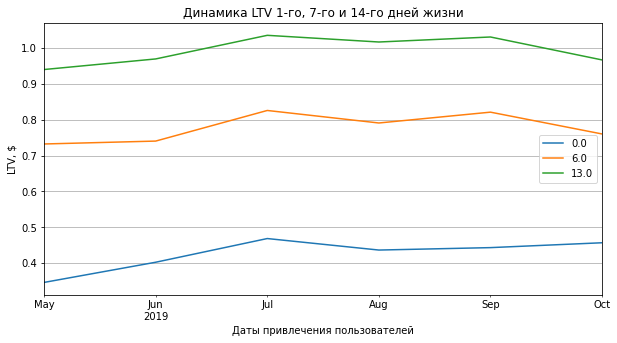

In [113]:
report = ltv_history[[0,6,13]]  # делаем срез данных
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика LTV 1-го, 7-го и 14-го дней жизни')
plt.ylabel('LTV, $')
plt.xlabel('Даты привлечения пользователей')
plt.show()

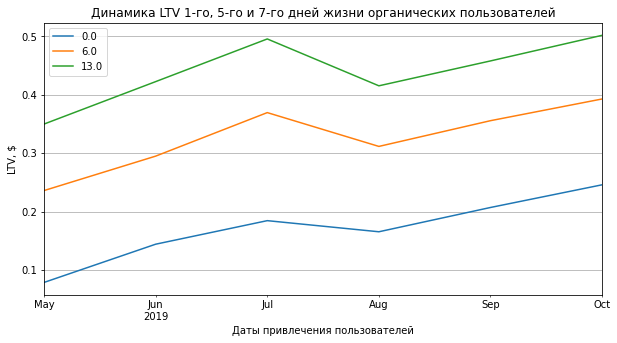

In [114]:
profiles_organic = get_profiles(visits_organic)
ltv_raw_organic, ltv_organic, ltv_history_organic = get_ltv(
    profiles_organic, orders, datetime(2019, 11, 1).date(), 14
)

report = ltv_history_organic[[0, 6, 13]]  # делаем срез данных
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика LTV 1-го, 5-го и 7-го дней жизни органических пользователей')
plt.ylabel('LTV, $')
plt.xlabel('Даты привлечения пользователей')
plt.show()


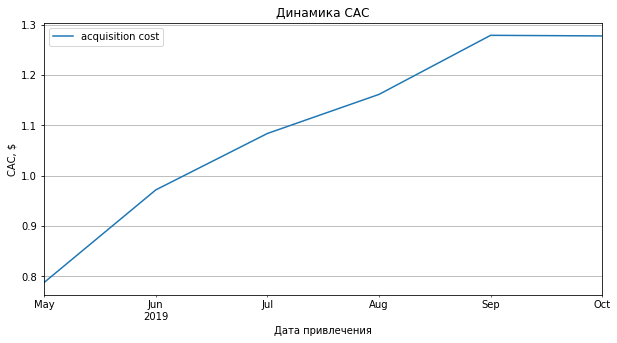

In [115]:
cac_history = profiles.pivot_table(
    index='month', values='acquisition cost', aggfunc='mean'
)

cac_history.plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС')
plt.show()

In [116]:
#roi_history = ltv_history.drop(columns=['cohort_size']).reset_index()
#roi_history = roi_history.iloc[:, list(range(1,15))].div(cac_history.reset_index()['acquisition cost'], axis=0)
#print(roi_history)
#cac_history.reset_index()['acquisition cost']

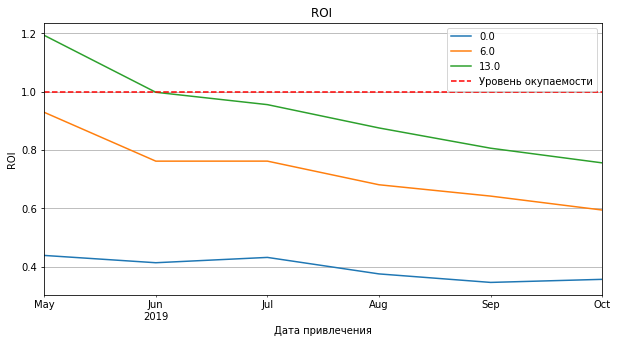

In [117]:
roi_history.pivot_table(
    index='month', values=[0,6,13]
).plot(grid=True, figsize=(10, 5))

plt.title('ROI ')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

**Выводы**
1. LTV, то есть средняя выручка, приносимая одним юзером за день из лайфтайма, заметно снизилась с июля по август для всех рассматриваемых дней лайфтайма, затем отскочила и снова начала снижаться, начиная с сентября. Однак снижение LTV в сентябре затронуло только 7 и 14 дни лайфтайма. Это может говорить о том, что 1) пользователи стали меньше совершать повторных покупок 2) пользователи стали совершать меньше покупок в принципе, не считая самых "разогретых", кто покупает в первый день после посещения сайта.
Так как для органических пользователей также произошло снижение LTV с июля по август, можно предположить, что этот провал не был связан с эффективностью рекламной кампании.
Возможно проблему стоит искать в рекламной кампании, проводимой в период, начиная с сентября.
2. CAC, то есть средняя стоимость привлечения клиента, непрерывно росла до сентября. В сентябре рост остановился.
3. Roi, то есть окупаемость инвестиций в клиентов, непрерывно снижалась на протяжении всего рассматриваемого периода для 7 и 14 дней. Пользователи последнего дня периода окупаемости перестали окупаться в июле.

#### Конверсия и удержание 
Задачи:
1. Проверить конверсию пользователей и динамику её изменения. 
2. То же самое сделайте с удержанием пользователей. 
3. Построить и изучить графики конверсии и удержания.

##### Графики конверсии

In [118]:
cr_raw, cr, cr_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14)
cr


,cohort size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,90016,0.0615,0.068999,0.072665,0.075209,0.077131,0.078431,0.079397,0.080241,0.080941,0.081608,0.08203,0.082352,0.082585,0.082874


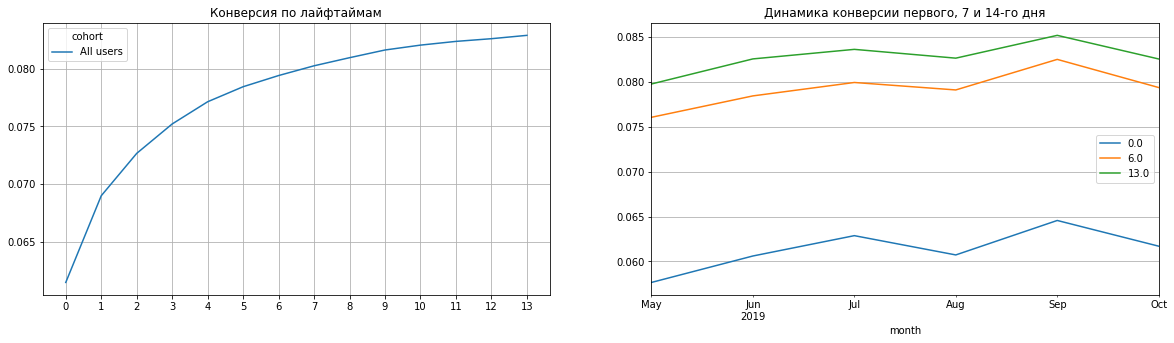

In [119]:

report = cr.drop(columns=['cohort size'])
plt.figure(figsize=(20, 5))
report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)

plt.title('Конверсия по лайфтаймам')

cr_history.drop(columns=['cohort size']).iloc[:, [0,6,13]].plot(grid=True, ax = plt.subplot(1,2,2))
# во второй ячейке постройте график истории изменений
# выберите нужный день «жизни» и постройте сводную таблицу
# постройте график и задайте его параметры
plt.title('Динамика конверсии первого, 7 и 14-го дня')

plt.show()

##### Графики удержания

<Figure size 1440x360 with 0 Axes>

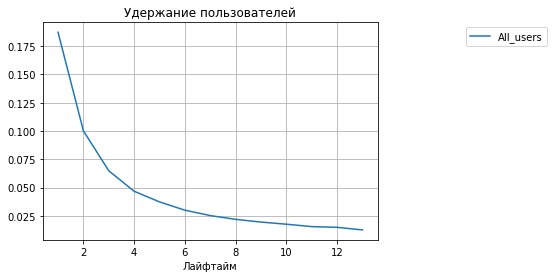

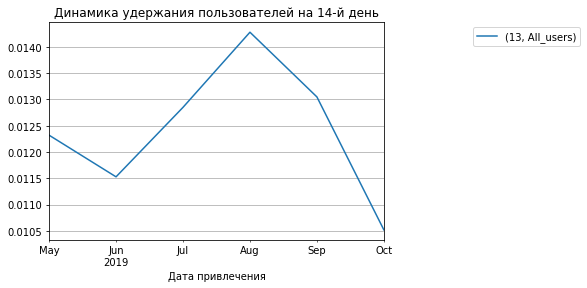

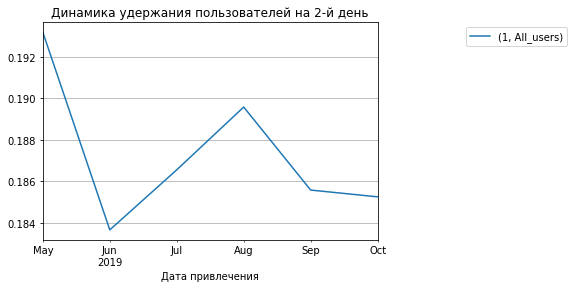

In [120]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14
)

plot_retention(retention, retention_history, 14)

##### Графики конверсии по признакам

###### Конверсия по странам

In [121]:
cr_reg_raw, cr_reg, cr_reg_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'])

<Figure size 1800x720 with 0 Axes>

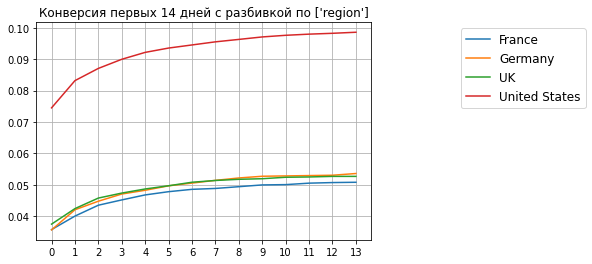

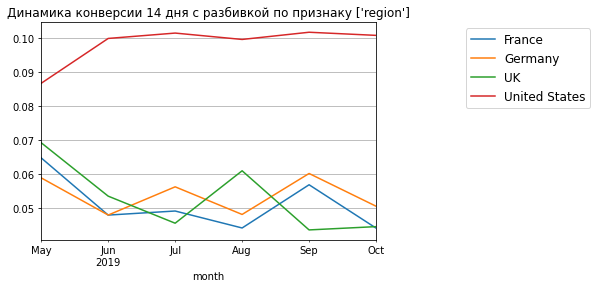

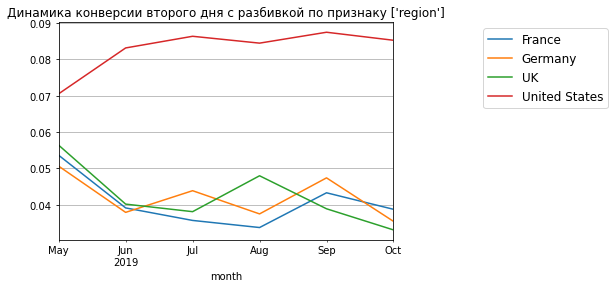

In [122]:
plot_conversion(cr_reg, cr_reg_history, dimensions=['region'])

###### Конверсия по устройствам

<Figure size 1800x720 with 0 Axes>

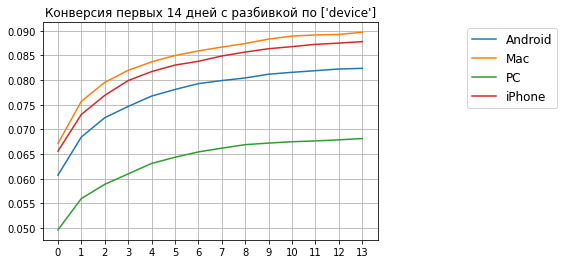

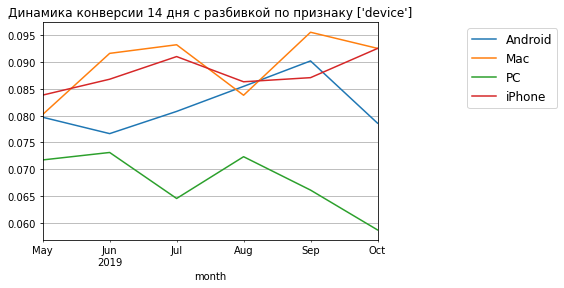

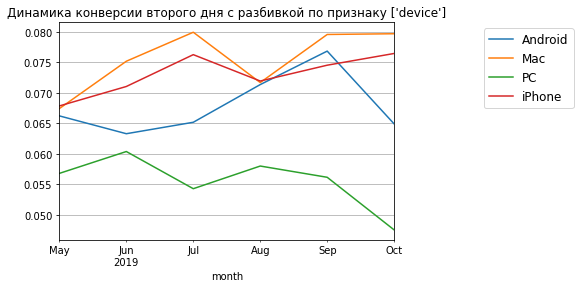

In [123]:
cr_dev_raw, cr_dev, cr_dev_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

plot_conversion(cr_dev, cr_dev_history, dimensions=['device'])

###### Конверсия по каналам привлечения

<Figure size 1800x720 with 0 Axes>

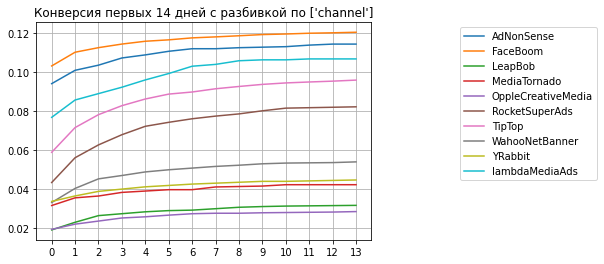

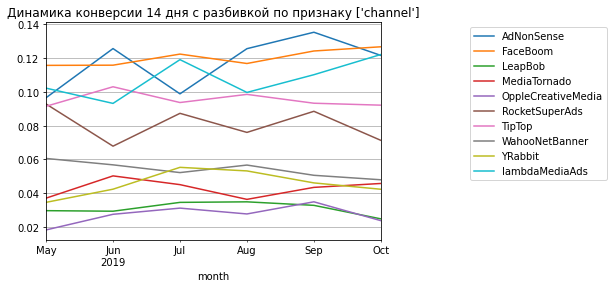

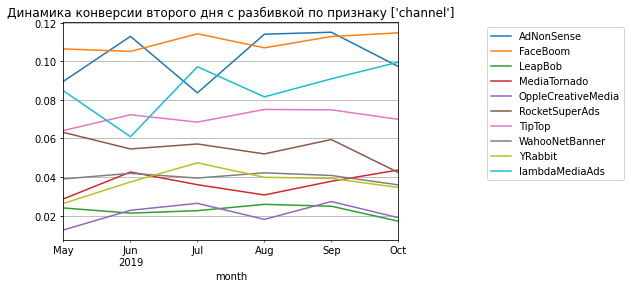

In [124]:
cr_chan_raw, cr_chan, cr_chan_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

plot_conversion(cr_chan, cr_chan_history, dimensions=['channel'], legend = 10)

##### Графики удержания по признакам

###### Удержание по странам

<Figure size 1440x360 with 0 Axes>

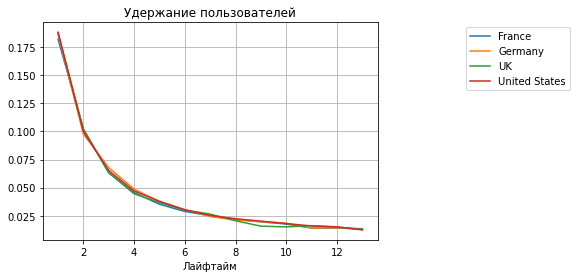

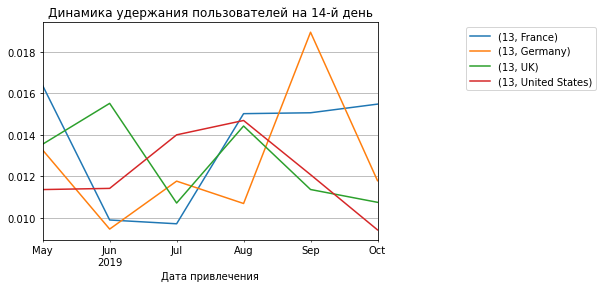

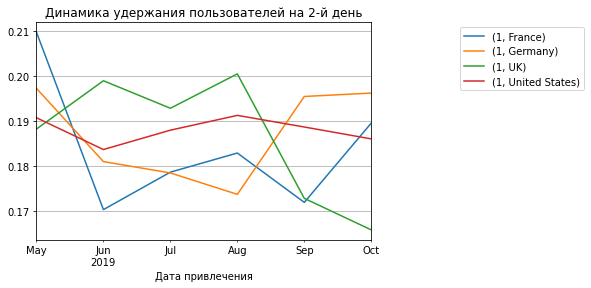

In [125]:
retention_reg_raw, retention_reg, retention_reg_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plot_retention(retention_reg, retention_reg_history, 14, dimensions='region')

###### Удержание по устройствам

<Figure size 1440x360 with 0 Axes>

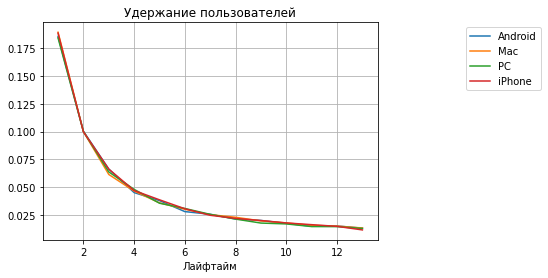

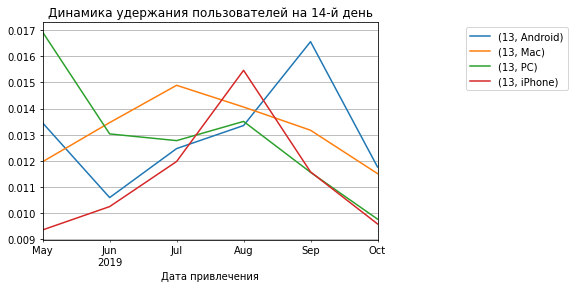

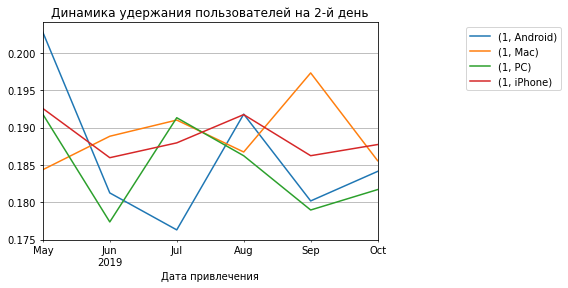

In [126]:
retention_dev_raw, retention_dev, retention_dev_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_retention(retention_dev, retention_dev_history, 14, dimensions = 'device')

###### Удержание по каналам привлечения

<Figure size 1440x360 with 0 Axes>

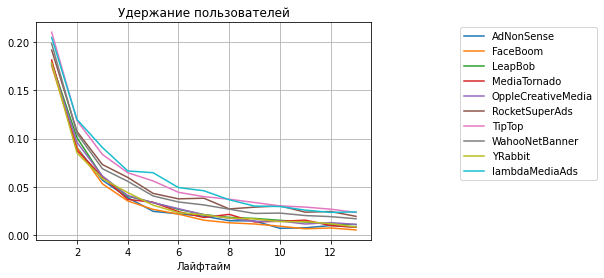

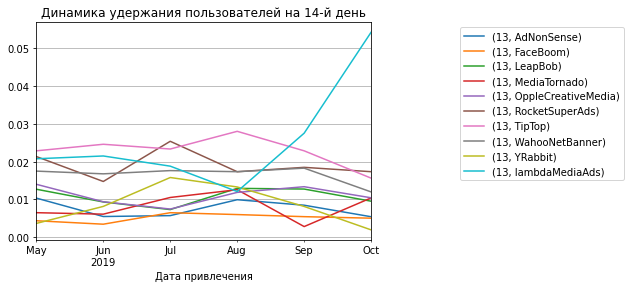

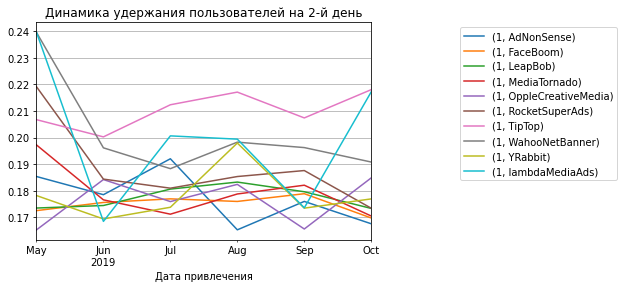

In [127]:
retention_chan_raw, retention_chan, retention_chan_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_retention(retention_chan, retention_chan_history, 14, dimensions = 'channel')

**Выводы**
1. В cреднем в первый день лайфтайма посетители конвертируются в покупателей в 6% случаев, к концу второй недели конверсия повышается до 8.3%. График конверсии имеет отрицательную скорость роста, то есть с каждым днем вероятность того что посетитель станет покупателем снижается. 
2. С июля по август наблюдалась просадка для всех дней лайфтайма, также спад начался с сентября.
3. Удержание пользователей для второго дня составляет 1.9%, для последнего - 1.3%. Это означает, что в среднем только 1.9% пользователей, посетивших сайт в первый день, посещает его на второй день. Соответственно, до конца второй недели "доживает" только 1.3%.
Также, опираясь на график, делаем вывод, что чаще всего пользователи теряются в первые дни лайфтайма.
4. Удержание для последнего дня лайфтайма росло с июля по сентябрь и начало снижаться, начиная с сентября.

О чем говорит факт что в августе удержание росло, при том, что конверсия падала?
Выходит, что августовский провал в окупаемости клиентов связан с тем что привлеченные пользователи плохо конвертировались в платящих. Возможно, проблема была в самом продукте или были проблемы с приложением. А с сентября, как будто бы, начали поступать незаинтересованные пользователи, которые и не задерживались в приложении, и не покупали тарифов.

**Выводы по конверсии по признакам**
1. Самая большая конверсия с огромным отрывом в Штатах
2. В сентябре резко упала конверсия в Германии и Франции
3. В сентяре конверсия упала практически для всех источников. В FaceBoom, одном из самых крупных каналов привлечения, конверсия не упала.

**Выводы по удержанию по признакам**
1. В сентябре резкое падение удержания для всех стран кроме Франции
2. В сентбря резкое падение удержания для всех устройств
3. В сентябре резкое падение удержания практически для всех каналов.

#### Окупаемость по устройствам
- Проанализировать окупаемость рекламы с разбивкой по устройствам. 
- Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

##### САС по устройствам


In [128]:
cac_device = ltv_profiles.groupby('device')['acquisition cost'].mean()
cac_device

device
Android    1.005243
Mac        1.255955
PC         0.780437
iPhone     1.257412
Name: acquisition cost, dtype: float64

 ##### LTV, ROI и  их динамика по устройствам

In [129]:
ltv_device_raw, ltv_device, ltv_device_history, roi_device_grouped, roi_device_history, cac_device = get_ltv_roi(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)


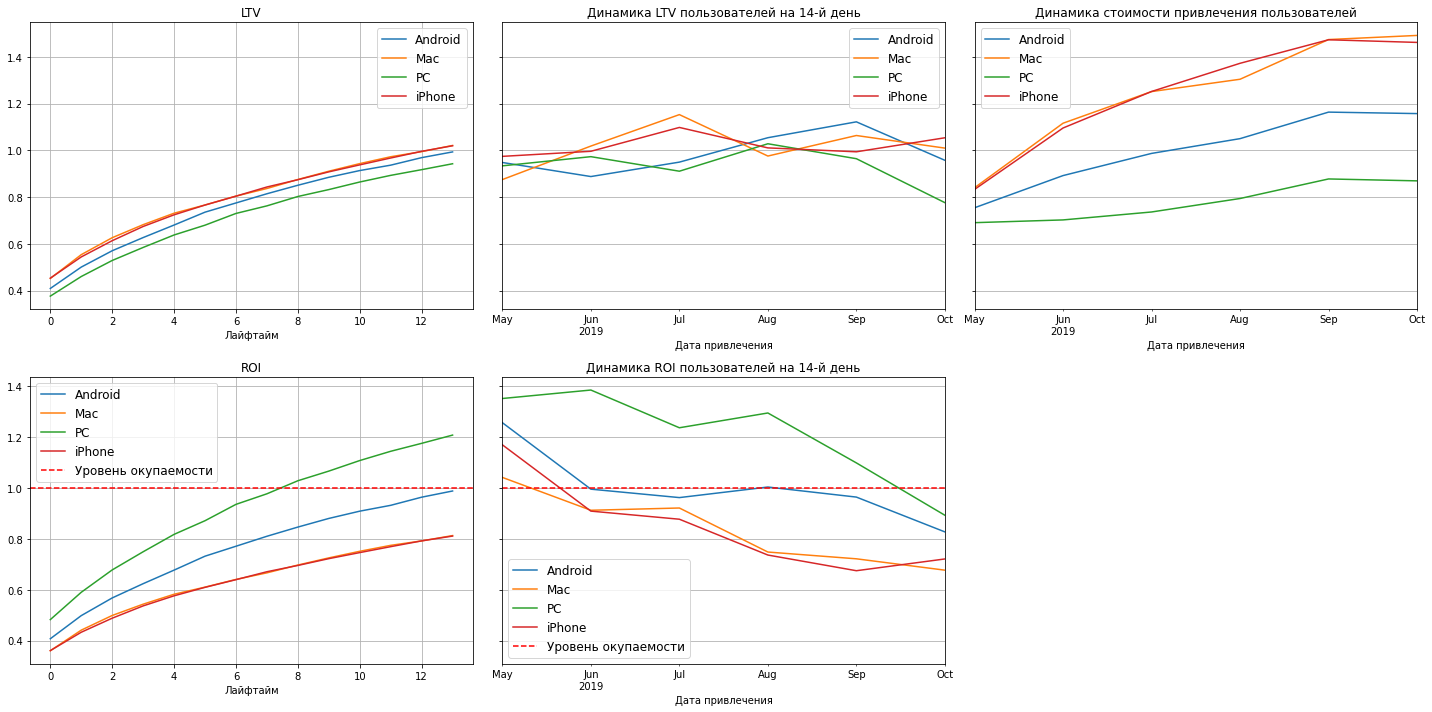

In [130]:
plot_ltv_roi(ltv_device, ltv_device_history, roi_device_grouped, roi_device_history, 14, window=1)


##### Выводы

1. К концу второй недели окупаются только пользователи PK, а Android только достигают безубыточности. 
2. Так как LTV является примерно одинаковым для всех устройств, проблему стоит искать в стоимости привлечения. Для пользователей Мак и Айфон стоимость привлечения заметно выше. Самая низкая - как раз для PC.
3. Окуапаемость пользователей всех девайсов снижалась на протяжении всего времени. Однако наиболее заметный спад начался в сентябре, не считая Iphon, который в этот период показал рост.


#### Окупаемость по странам

In [131]:
ltv_country_raw, ltv_country, ltv_country_history, roi_country_grouped, roi_country_history, cac_country = get_ltv_roi(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)



##### САС по странам

In [132]:
cac_country = ltv_profiles.groupby('region')['acquisition cost'].mean()
cac_country

region
France           0.453719
Germany          0.457482
UK               0.448000
United States    1.433334
Name: acquisition cost, dtype: float64

##### LTV, ROI и их динамика по странам

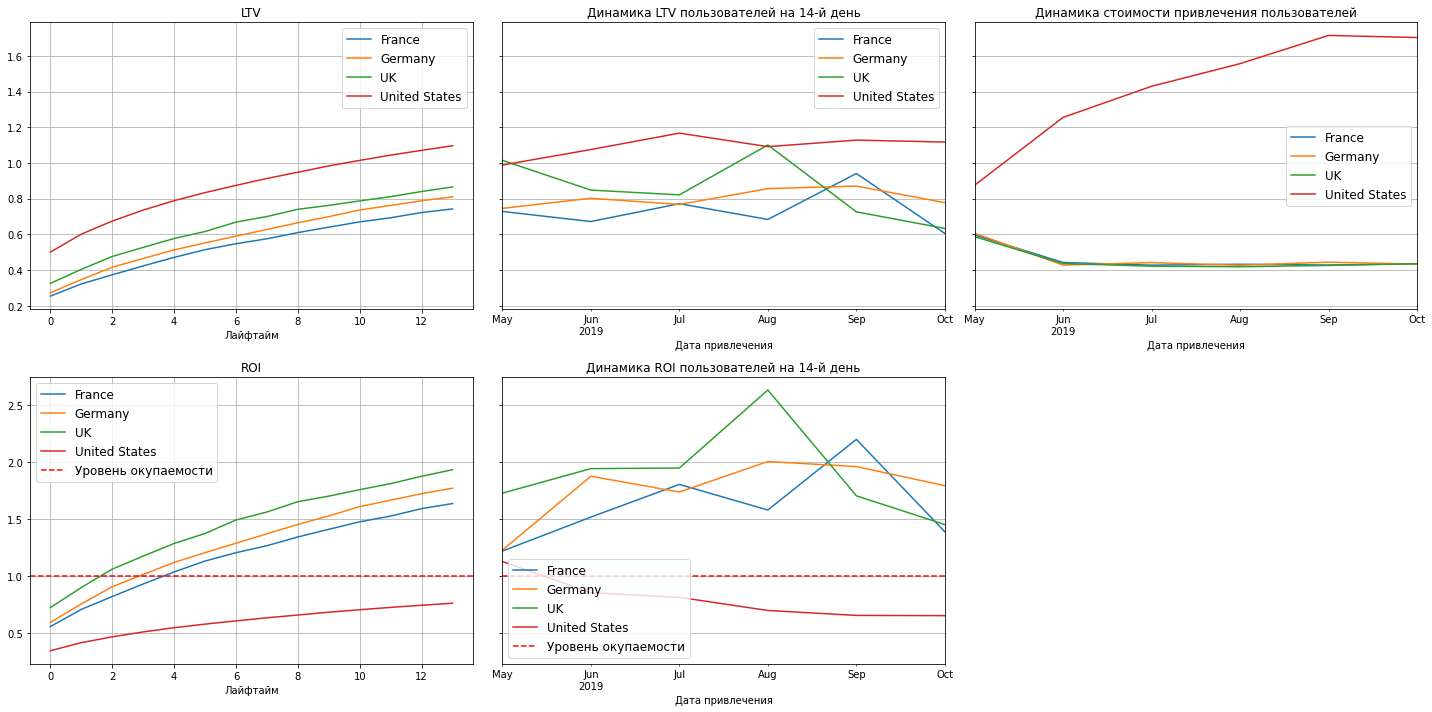

In [133]:
plot_ltv_roi(ltv_country, ltv_country_history, roi_country_grouped, roi_country_history, 14, window=1)

**Выводы**
1. У пользователей из США очень низкая окупаемость, к концу второй недели их ROI составляет только 70%.
Учитывая тот факт, что пользователи из Штатов показывают лучшую среднюю выручку, очевидно, дело в стоимости привлечения. Стоимость привлечения одного клиента из США стоит на доллар выше чем привлечение из других стран.
2. В сентябре начался заметный спад окупаемости для всех регионов, кроме США, что связано со снижением их LTV.


#### Окупаемость по каналам привлечения

In [134]:
ltv_channel_raw, ltv_channel, ltv_channel_history, roi_channel_grouped, roi_channel_history, cac_channel = get_ltv_roi(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)



##### CAC по каналам

In [135]:
cac_channel

,cac
channel,
AdNonSense,0.981768
FaceBoom,1.104795
LeapBob,0.207668
MediaTornado,0.211572
OppleCreativeMedia,0.247085
RocketSuperAds,0.402290
TipTop,2.725506
WahooNetBanner,0.595592
YRabbit,0.207961


In [136]:
# Во сколько раз стоимость ТипТоп превышает среднюю стоимость
2.7255506 / cac_channel.mean()

cac    3.69153
dtype: float64

In [137]:
# Во сколько раз стоимость FaceBoom превышает среднюю стоимость
1.104795 / cac_channel.mean()

cac    1.496352
dtype: float64

In [138]:
#Доля вложений в ТипТоп от общих вложений в рекламу
costs[costs['channel'] == 'TipTop']['costs'].sum() / costs['costs'].sum()

0.5189829502745568

In [139]:
#Аналогично для FaceBoom
costs[costs['channel'] == 'FaceBoom']['costs'].sum() / costs['costs'].sum()

0.3075491031524029

##### LTV, ROI и их динамика по каналам привлечения

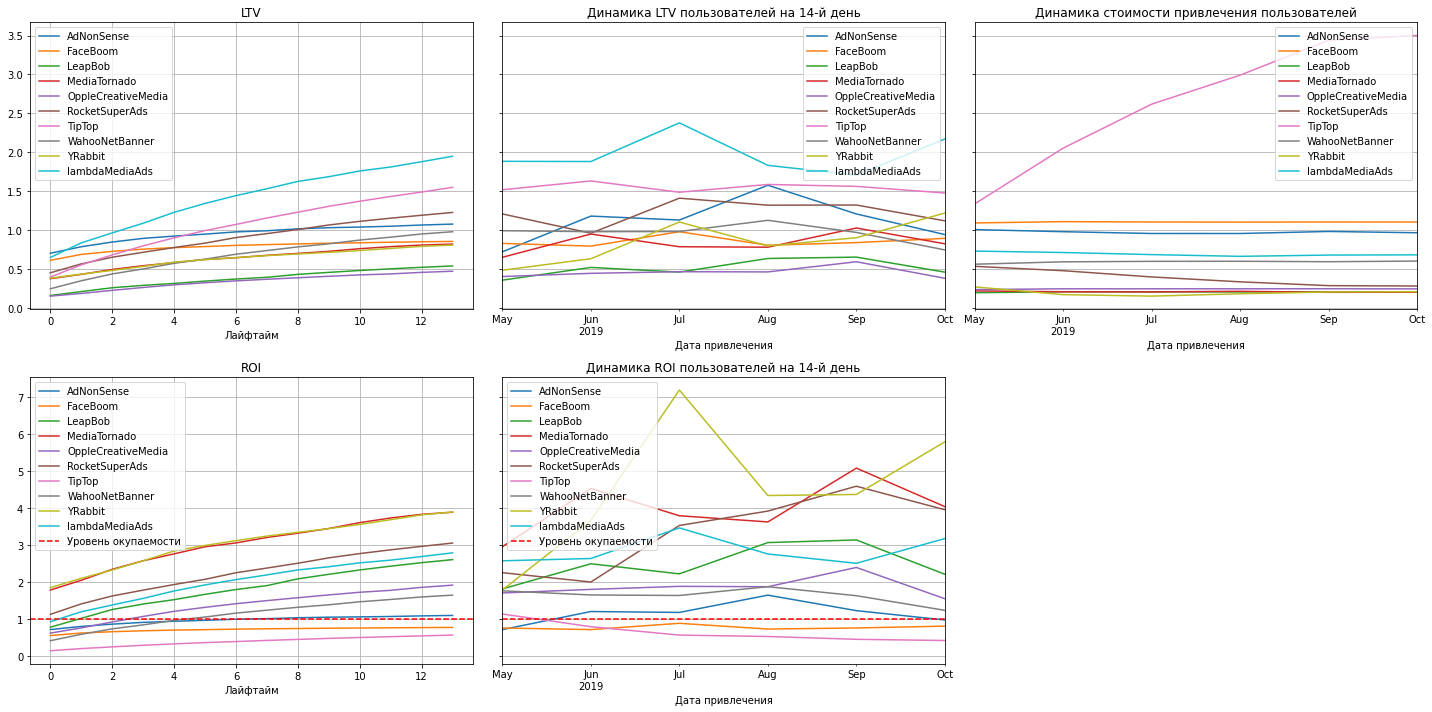

In [140]:
plot_ltv_roi(ltv_channel, ltv_channel_history, roi_channel_grouped, roi_channel_history, 14, window=1, fontsize=10)

**Выводы**
1. Не окупаются даже к концу второй недели только два источника - TipTop и FaceBoom. Но так как пользователей, привлеченных из этих источников, очень много, то средняя окупаемость оказывается ниже черты.
2. Особенно плохими являются показатели источника TipTop, который на протяжении всего периода улетал в стратосферу. К октябрю стоимость привлечения одного пользователя для TipTop достигла 3.5 доллара, а вернулось в виде выручки только половина от стоимости привлечения.
3. Лучшие показатели окупаемости у двух источников - Yrabbit и MediaTornado. Начиная с сентября, они единственные показали рост ROI в условиях общего "кризиса".


#### Углебление изучения: ROI по сочетаниям признаков

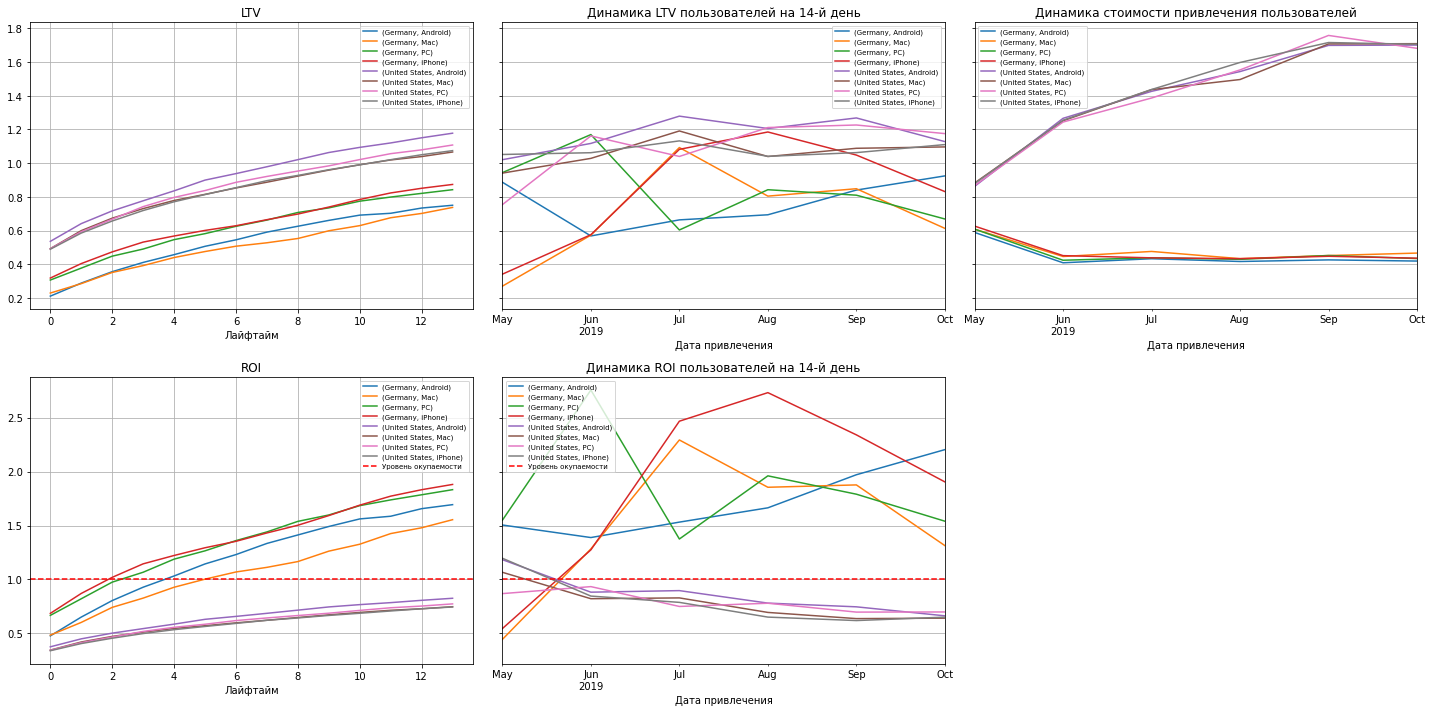

In [141]:
profiles_usa_ge = profiles[profiles['region'].isin(['United States', 'Germany'])]


ltv_country_device_raw, ltv_country_device, ltv_country_device_history, roi_country_device_grouped, roi_country_device_history, cac_country_device = get_ltv_roi(profiles_usa_ge, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region','device']
)


plot_ltv_roi(ltv_country_device, ltv_country_device_history, roi_country_device_grouped, roi_country_device_history, 14, window=1, fontsize=7)


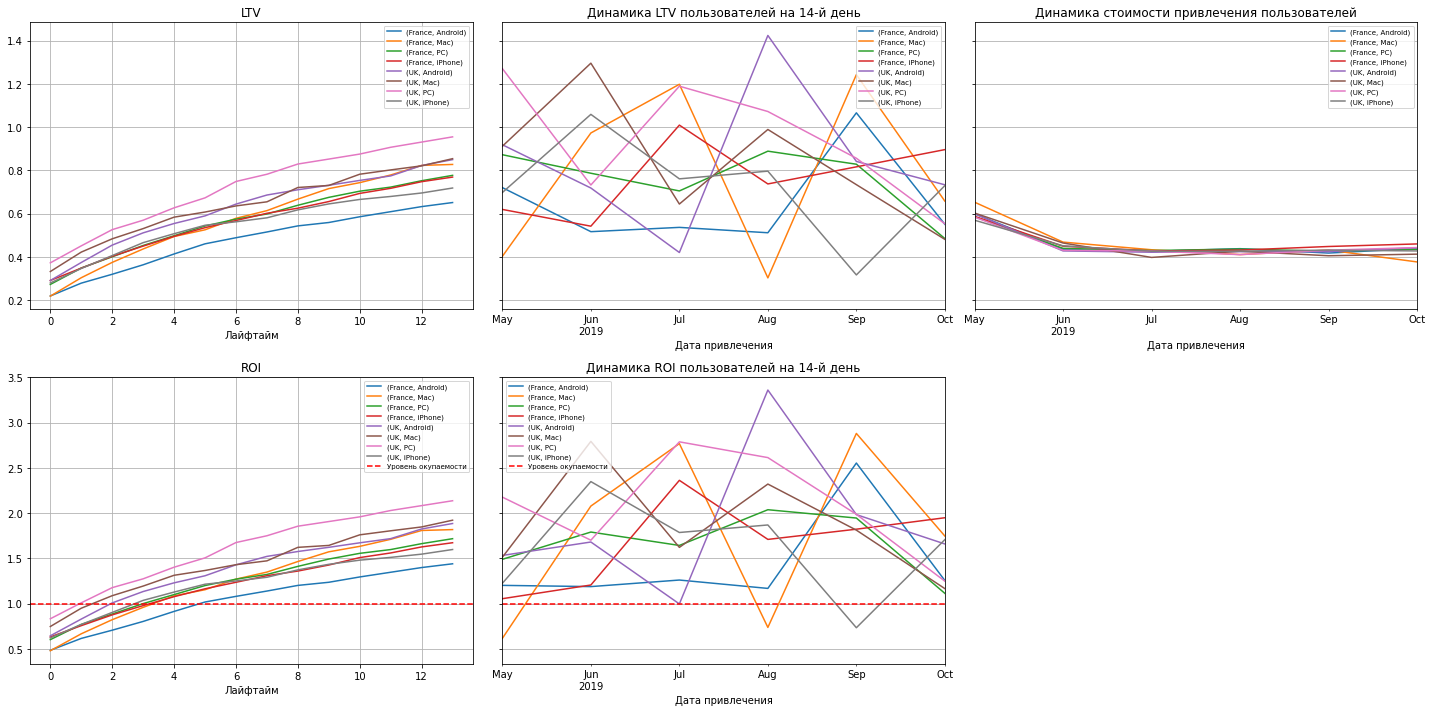

In [142]:
profiles_uk_fr = profiles[~profiles['region'].isin(['United States', 'Germany'])]

ltv_country_device_raw, ltv_country_device, ltv_country_device_history, roi_country_device_grouped, roi_country_device_history, cac_country_device = get_ltv_roi(profiles_uk_fr, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region','device']
)


plot_ltv_roi(ltv_country_device, ltv_country_device_history, roi_country_device_grouped, roi_country_device_history, 14, window=1, fontsize=7)


**Выводы**

Графики не очень наглядны из-за большого количества пар признаков и соответствующих им линий графика, однако главный вывод сделать легко: проблемы пользователей США не дифференцируются по девайсам

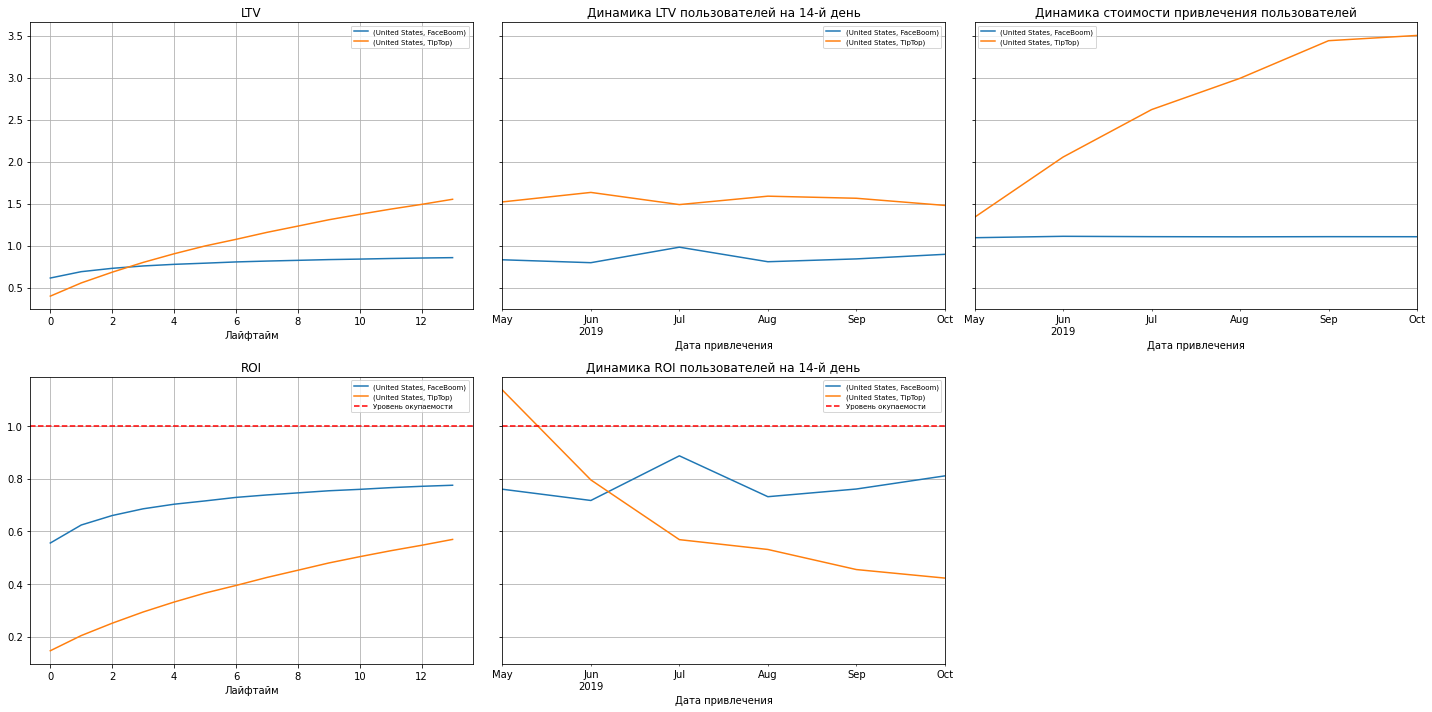

In [144]:

profiles_tt_fb = profiles[(profiles['channel'] == 'TipTop') | (profiles['channel'] == 'FaceBoom')]
profiles_tt_fb
ltv_country_tt_fb_raw, ltv_country_tt_fb, ltv_country_tt_fb_history, roi_country_tt_fb_grouped, roi_country_tt_fb_history, cac_country_tt_fb= get_ltv_roi(profiles_tt_fb, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region', 'channel']
)


plot_ltv_roi(ltv_country_tt_fb, ltv_country_tt_fb_history, roi_country_tt_fb_grouped, roi_country_tt_fb_history, 14, window=1, fontsize=7)


In [145]:
profiles_tt_fb['device'].value_counts()

iPhone     22053
Mac        12185
Android     9854
PC          5075
Name: device, dtype: int64

In [146]:
profiles_usa = profiles[profiles['region'] == 'United States']
profiles_usa['channel'].value_counts()

FaceBoom          29373
TipTop            19794
RocketSuperAds     4622
MediaTornado       4526
YRabbit            4507
Name: channel, dtype: int64

In [147]:
profiles_usa['device'].value_counts()



iPhone     27996
Mac        15665
Android    12630
PC          6531
Name: device, dtype: int64

In [148]:
profiles_iphon = profiles[profiles['device'] == 'iPhone']
profiles_iphon['region'].value_counts()

United States    27996
UK                2313
France            2227
Germany           1897
Name: region, dtype: int64

**Выводы**

Реклама с использованием FB и TT проводилась исключительно в США. При этом в США эти источники привлечения были доминирующими, что объясняет очень низкую окупаемость пользователей из Штатов.
А учитывая, что в Штатах самым популярным устройством является Айфон, а также то, что США с огромным отрывом лидирует по числу пользователей, зашедших с Айфона, можем обосновать и просадку ROI для юзеров айфонов.

##### Сентябрьский спад

Почему начались проблемы с конверсией и LTV в сентябре?

Сентябрь - спад для андроид и пк, Франции и ВБ, 'MediaTornado', 'LeapBob', 'RocketSuperAds', 'OppleCreativeMedia', 'WahooNetBanner', 'AdNonSense'

Было бы неплохо посмотреть на связь между этим всем.

In [149]:
#Оставим только сентябрь для наглядности, а также оставим только Францию и ВБ, потому что резкий спад LTV в сентябре начался именно в них
profiles_sept = profiles[(profiles['month'].dt.month >= 9) & (profiles['region'].isin(['France', 'UK']))].reset_index()




In [150]:
profiles_sept['channel'].value_counts()

OppleCreativeMedia    2307
WahooNetBanner        2235
LeapBob               2172
AdNonSense             766
lambdaMediaAds         466
Name: channel, dtype: int64

In [151]:
profiles_sept['device'].value_counts()

PC         3208
Android    2292
iPhone     1637
Mac         809
Name: device, dtype: int64

In [152]:
profiles['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [153]:
for i in ['MediaTornado', 'LeapBob', 'RocketSuperAds', 'OppleCreativeMedia', 'WahooNetBanner', 'AdNonSense']:
    print(' ')
    print(i, ':')
    print(profiles[profiles['channel'] == i]['region'].value_counts())
    print(' ')

 
MediaTornado :
United States    4526
Name: region, dtype: int64
 
 
LeapBob :
UK         3083
France     3020
Germany    2546
Name: region, dtype: int64
 
 
RocketSuperAds :
United States    4622
Name: region, dtype: int64
 
 
OppleCreativeMedia :
UK         3090
France     3019
Germany    2599
Name: region, dtype: int64
 
 
WahooNetBanner :
UK         3036
France     2999
Germany    2610
Name: region, dtype: int64
 
 
AdNonSense :
France     1412
UK         1326
Germany    1250
Name: region, dtype: int64
 


**Выводы**

Спад начался во Франции и Великобритании. Были изучены самые популярные источники в этих странах - это OppleCreativeMedia, WahooNetBanner, LeapBob. Так как эти источники являются исключительно европейскими, мы не можем предположить, что именно привело к проблема с конверсией: проблемы с работой приложения  в Европе/какие-то иные региональные особенности ИЛИ неэффективность источников с точки зрения конвертирования посетителей в клиентов. 
Однако, интуитивно, проблема скорее всего именно в источниках.
Спад для пользователей Android и PC в сентября может объясняться тем, что эти устройства являются наиболее популярными в Европе, где начался спад окупаемости, как мы предположили, из-за неэффективности местных рекламных источников.

### Выводы и рекомендации для отдела маркетинга

Общие выводы
1. Реклама, направленная на привлечение пользователей, в среднем не окупается за стандартные 2 недели.
2. Провалы окупаемости наблюдались в периоды с июля по август и с сентября. Но так как провал в августе был обнаружен и для органических пользователей, можно исключить, что проблема была связана с рекламой.
3. Продолжая предыдущий пункт выводов, LTV и конверсия показали спад начиная с сентября, что и вызвало снижение окупаемости клиентов. Снижение конверсии в этот период говорит о том, что привлеченные пользователи стали реже становиться покупателям, т.е. совершать первую покупку. 

Переходя к более детальным выводам, можно выделить две главные проблемы маркетинга Procrastination Pro:
1. Использование дорогостоящих и неэффективных источников привлечения клиентов в США: TipTop и FaceBoom. TipTop и Faceboom оказались источниками с наименьшей окупаемостью. Учитывая, что на два этих канала привлечения приходится 80% рекламных вложений, можно назвать это главной причиной провала рекламной кампании приложения.

Проблемы каждого из источников:

- Проблемы FaceBoom связаны с плохими показателями средней выручки, которые приносят клиенты, что, в свою очередь, связано с очень низким удержанием пользователей из этого источника. Учитывая отличную конверсию для этого же источника, можно предположить, что аудитория FaceBoom не является целевой для приложения. Пользователи покупают тариф после удачной рекламы, однако потом не находят для себя ценности в приложении. Не последнюю роль в неокупаемости источника играет и его дороговизна, САС для FaceBoom в 1.5 выше чем в среднем, это второй после TipTop источник по затратности.

Отделу маркетинга Procrastination Pro рекомендуется проверить работу рекламы с использованием источника FaceBoom, убедиться, что реклама показывается целевой аудитории приложения. 

- Проблемы TipTop связаны с очень высокой стоимостью привлечения клиентов. Привлечения одного клиента по этому каналу стоит 2.7$, это в 3.7 раз выше, чем в среднем. Даже учитывая отличные показатели конверсии и удержания, этот источник совершенно не выгоден.

Отделу маркетинга приложения рекомендуется пересмотреть условия договора с TipTop или вовсе отказаться от услуг рекламы по этому каналу. Есть вероятность технической ошибки при сборе данных, потому что ситуация, когда тариф на рекламу повышается на протяжении всего периода, выглядит странной.

2. Сентябрьский спад для показателей окупаемости сложно однозначно объяснить, потому что он начался почти везде и почти во всем. В сентябре почти у всех стран, каналов и девайсов просели сразу конверсия и удержание. Можно предположить, что проблема в этот период была связана не с конкретным устройством или отдельными каналами привлечения, а с каким-то общим паттерном осенней рекламной кампании.

Рекомендуется провести дополнительное исследование, которое позволит более точно определить проблему спада окупаемости в сентябре. Важно более детально изучить связи между признаками (каналами, девайсами и странами) в сентября, а также обратиться к дополнительным данным, например, данным о событиях (рассылках, акциях и тд).

3. Также отделу маркетинга рекомендуется пересмотреть свое отношение к источникам Yrabbit и MediaTornado, показывающих высокий ROI
